<a href="https://colab.research.google.com/github/meetaliverma/Small-ML-practice-projects/blob/main/Student_grade_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("/content/student-mat (1).csv")


In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


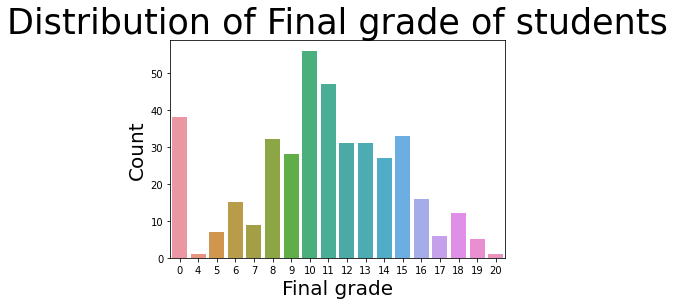

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize=35)
b.set_xlabel('Final grade', fontsize= 20)
b.set_ylabel('Count', fontsize= 20)
plt.show()

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
data.shape

(395, 33)

In [8]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
male_studs= len(data[data['sex']== 'M'])
female_studs= len(data[data['sex']=='F'])
print(f'Number of male students are {male_studs}')
print(f'Number of female students are {female_studs}')

Number of male students are 187
Number of female students are 208


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of students in different age groups')

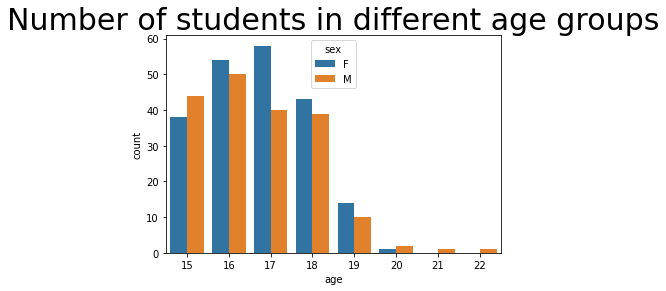

In [12]:
b = sns.countplot('age', hue= 'sex', data=data)
b.axes.set_title('Number of students in different age groups', fontsize=30)

In [13]:
#FROM THE ABOVE DATA, LET'S CREATE ONE MORE COLOUMN TO GET THE AVG GRADE FROM G1 TO G3
data['GradeAvg']= (data['G1']+data['G2']+data['G3'])/3

In [14]:
#NOW LET'S CREATE A GRADING BASED ON ITS G AVERAGE
#ABOVE 90%= GRADE A
#BETWEEN 70% AND 90% = GRADE B
# BELOW 70% = GRADE C

def find_grade(data):
  #create a list to store the data
  grades=[]

  #for each row in the column
  for row in data['GradeAvg']:
    #if more than a value
    if row >=(0.9*data['GradeAvg'].max()):
      grades.append(1)
    elif row>= (0.7*data['GradeAvg'].max()):
      grades.append('2')
    elif row < (0.7*data['GradeAvg'].max()):
      grades.append('3')
    #create a column from the list
    data['GradeAvg']= grades
    return data
